# Midterm

## Student ID: xxxx (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the midterm.** To finish the midterm in the alloted 2 hrs, you will have to work efficiently. **Read the entirety of each question carefully.**

You need to submit the midterm by the due date (18:30) on OWL in the Test and Quizzes section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [1]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk 
import scipy 

# Get individual functions from 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, plot_roc_curve, mean_absolute_percentage_error, r2_score, roc_auc_score
from scipy.stats import norm

# Plot here directly
%matplotlib inline

In [2]:
# Download the data (if not uploading directly)

# !gdown https://drive.google.com/uc?id=1PUcM6kytvlnOLTSEEpxDOicQzlsecKD_

## Data - Wisconsin Breast Cancer

In this midterm, we will be studying how regression models can support medical practice, in particular the diagnosis of breast cancer.

Each record represents follow-up data for one breast cancer case.  These are consecutive patients seen by Dr. William H. Wolberg, member of the General Surgery Dept. at the University of Wisconsin since 1984, and include only those cases exhibiting invasive breast cancer. 

The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The variables in the dataset are the following:

1. ID number (Non predictive).
2. Outcome (R = recur, N = nonrecur, TARGET)
3. Time (recurrence time if field 2 = R, disease-free time if field 2 = N, TARGET)

All other variables are **predictive**:

4. Tumor size - diameter of the excised tumor in centimeters

Variables 5-34 represent ten real-valued features that are computed the cell nucleus, representing:  
  a. radius (mean of distances from center to points on the perimeter)  
  b. texture (standard deviation of gray-scale values)  
  c. perimeter  
  d. area  
  e. smoothness (local variation in radius lengths)  
  f. compactness (perimeter^2 / area - 1.0)  
  g. concavity (severity of concave portions of the contour)  
  h. concave points (number of concave portions of the contour)  
  i. symmetry  
  j. fractal dimension ("coastline approximation" - 1)  

For each variable, the mean, SD and average of the worst three values are calculated. Variables 5-14 have the mean values, 15 - 24 the SD and 25 - 34 the worst three point average.

We will study how the image-related features (4-34) relate to both the recurrence time and the chances of recurrence for this dataset.

## Task 1 - Regression Model and Bootstrapping (45 pts)

### Question 1.1 Data Loading (5 pts)

  a. Read the data into the dataset ```cancer_data```.  
  b. Show the first few rows of the dataset.  
  c. Print the shape (rows and columns) of the dataset.  
  d. Print the descriptive statistics of the dataset.  
  e. Print how many cases are in class R and in class N, for the ```Outcome``` target variable.

In [3]:
# Read the data. (1 point)
cancer_data = pd.read_csv("Dataset.csv")

In [4]:
# Print the first few rows (1 point)
cancer_data.head()

,ID,Outcome,Time,tumor_size,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,...,Worst3_radius,Worst3_texture,Worst3_perimeter,Worst3_area,Worst3_smoothness,Worst3_compactness,Worst3_concavity,Worst3_concave_points,Worst3_symmetry,Worst3_fractal_dimension
0,119513,N,31,5.0,18.02,27.60,117.50,1013.0,0.09489,0.1036,...,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113
1,8423,N,61,3.0,17.99,10.38,122.80,1001.0,0.11840,0.2776,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,842517,N,116,2.5,21.37,17.44,137.50,1373.0,0.08836,0.1189,...,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067
3,843483,N,123,2.0,11.42,20.38,77.58,386.1,0.14250,0.2839,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,843584,R,27,3.5,20.29,14.34,135.10,1297.0,0.10030,0.1328,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Shape of the dataset (1 point)
print("The shape of the data set is", cancer_data.shape)

The shape of the data set is (198, 34)


In [6]:
# Descriptive statistics of the dataset (1 point)
cancer_data.describe()

,ID,Time,tumor_size,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,Worst3_radius,Worst3_texture,Worst3_perimeter,Worst3_area,Worst3_smoothness,Worst3_compactness,Worst3_concavity,Worst3_concave_points,Worst3_symmetry,Worst3_fractal_dimension
count,1.980000e+02,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,2.847475,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,...,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828
std,2.889025e+06,34.462870,1.937964,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,...,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172
min,8.423000e+03,1.000000,0.400000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,...,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.557452e+05,14.000000,1.500000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,...,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577
50%,8.863390e+05,39.500000,2.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,...,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890
75%,9.279958e+05,72.750000,3.500000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,...,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375
max,9.411300e+06,125.000000,10.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,...,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500


In [7]:
# Outcome descriptives (1 point)
N, R = cancer_data.Outcome.value_counts()
print("There are ", N, " N values and ", R, "R values")

There are  151  N values and  47 R values


### Question 1.2 Plotting (10 points)

a. Plot the histograms and kernel densities of the ```Time``` variable (distribution), so that both the histogram and kernel density appear in the same plot. Make two plots, one for recurring cases and non-recurring cases Title your plots accordingly. (5 pts)

b. For the mean variables (5-14), create a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) showing the joint scatterplots of those variables, setting the ```hue``` parameter to the ```Outcome``` variable.  (2 pts)

c. Discuss what do you see in the plot for questions a and b. What shape are the distributions of the ```Time``` variable? For the predictive variables, what variables are strongly correlated? Why do you think this is? (3 pts)

Text(0.5, 6.79999999999999, 'Time')

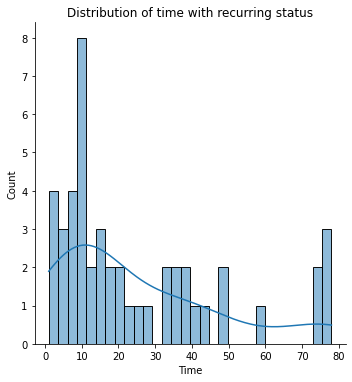

In [8]:
# Plot histogram and KDE - Recurring (2 points)
time_R = cancer_data[cancer_data.Outcome == "R"].Time.values
sns.displot(time_R,  bins = 30, kde = True)
plt.title("Distribution of time with recurring status")
plt.xlabel("Time")

Text(0.5, 6.79999999999999, 'Time')

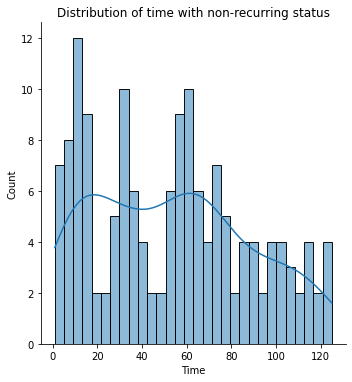

In [9]:
# Plot histogram and KDE - Non-Recurring (2 points)
time_R = cancer_data[cancer_data.Outcome == "N"].Time.values
sns.displot(time_R,  bins = 30, kde = True)
plt.title("Distribution of time with non-recurring status")
plt.xlabel("Time")

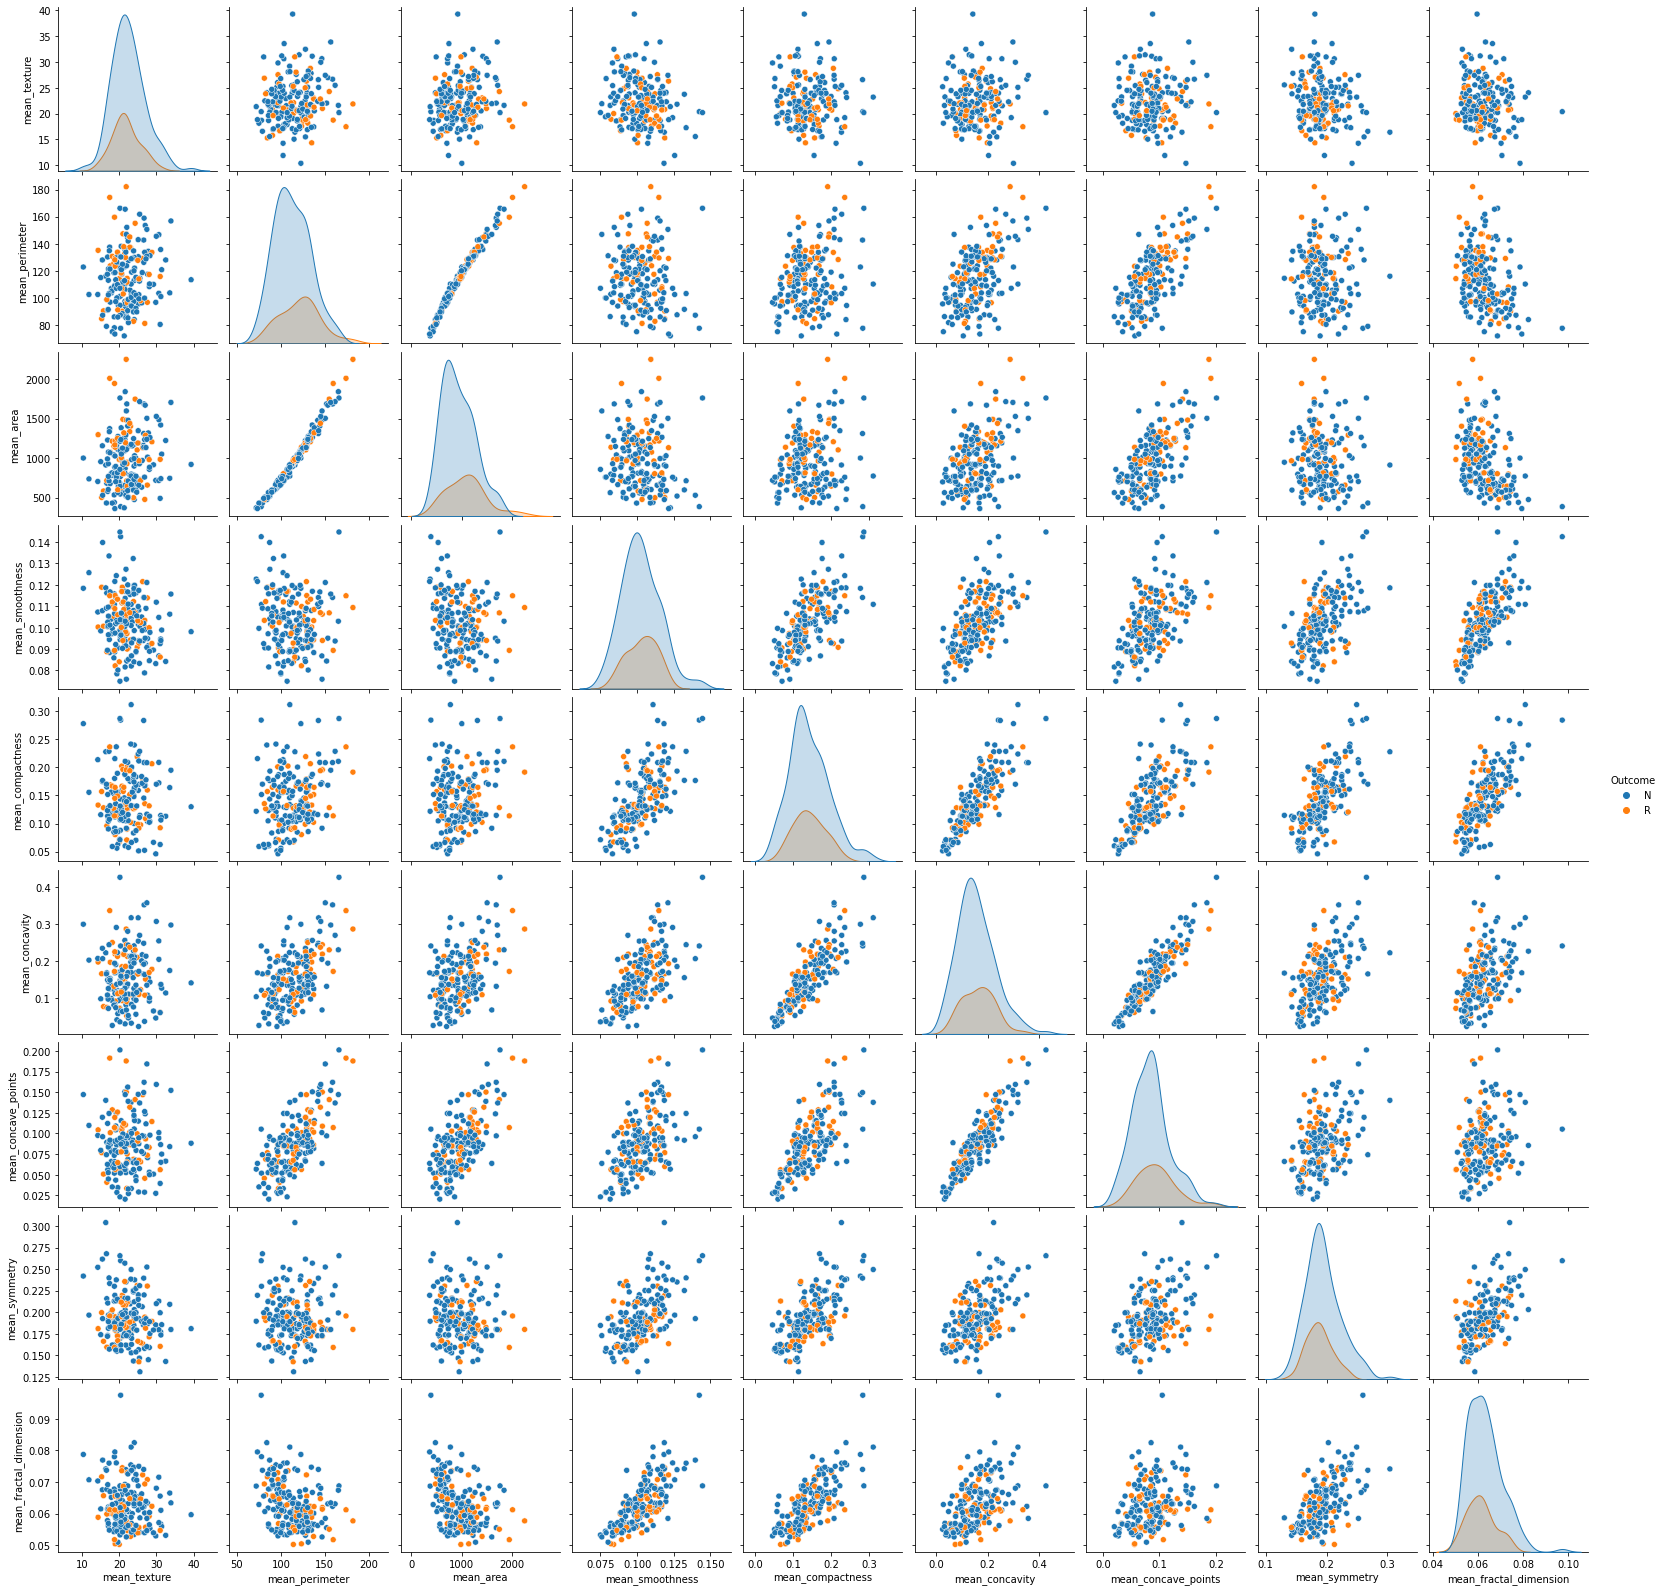

In [10]:
# Pairplot (2 points)
plotDf = cancer_data.iloc[:, 5:14] 
plotDf["Outcome"] = cancer_data.Outcome
sns.pairplot(plotDf, hue = "Outcome")

**Written answer (4 pts):**
It seems as though the time variables has larger values when the patient is non-recurring. Particularly, in the recurring histogram it seems as though the histogram is roughly exponential, with most times small and few larger ones. This is less clear with non-recurring. The disributions appear exponential. It is clear that the mean_area and mean_perimeter variables are strongly correlated, which makes sense as a larger area would correpond to a larger perimeter. Similarly concavity and concave points are coorelated.

### Question 1.3 Elastic Net Regression (15 points)

Now we will study the Time distribution for non-recurring cases.

1. Create a train / test split (70/30) for the dataset, selecting **only the Non-Recurring cases** (```Outcome == 'N'```), and use ```random_state=0```. (2 pts)
2. Create a pipeline that standardizes the predictive variables (tumor-related features) and that runs a regression with ElasticNet regularization using the ```Time``` variable as the target. Tune the parameter using three folds, 100 alpha values, and an adequate selection for the ```l1_ratio``` parameter. Train until convergence and report the best ```l1_ratio``` and alpha parameters. (10 pts)
3. What coefficients are significant? Which ones are not? Print a table with the coefficient names and its values for the optimal regression on step 2. (3 pts)

In [11]:
# Train test split (2 pts)
X = cancer_data.loc[cancer_data.Outcome == "N"]
y = X.Time

# Use a train-=test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X.drop("Time", axis = "columns"),
                                                y, 
                                                test_size=0.3,
                                                random_state=0)


In [12]:
# Pipeline (8 pts)
Xtrain.shape
#num_vars = np.arange(0, 31)

# All variables need to be scaled, I will not send in non-predictive variables

pipe = Pipeline([
                 ('scaling', StandardScaler()),
                 ('ElasticNet', ElasticNetCV(alphas = np.linspace(0.1,5,100), 
                                                          cv = 3, 
                                                          l1_ratio = np.array([.1, .5, .7, .9, .95, .99, 1])
                                                          ))])
#pipe = Pipeline(steps=[('feature_processing', FeatureUnion(transformer_list = [
#                                      ('binary', FunctionTransformer(lambda data: data.iloc[:, binary_vars])),
#                                      #Standardize
#                                      ('standard', Pipeline(steps = [
#                                        ('select', FunctionTransformer(lambda data: data.iloc[:, num_vars])),
#                                        # Polynomial transform could go here. If want to scale only a few, then would
                                        # stack another feature transformer
                                        #('poly', PolynomialTransformer(degree = 3, include_bias = False))
#                                        ('scaler', StandardScaler()) 
   #                                                     ]))
#                            ])),
#                              ('ElasticNet', ElasticNetCV(alphas = np.linspace(0.1,5,100), 
#                                                          cv = 3, 
#                                                          l1_ratio = np.array([.1, .5, .7, .9, .95, .99, 1])
#                                                          ))]
#)


In [13]:
# Train and show best parameters (2 pts)
# Outcome is not needed as a predictor, neither is ID. Get rid of both.

pipe.fit(Xtrain.drop(["Outcome", "ID"], axis = "columns"), ytrain)
best_alpha = pipe[1].alpha_
l1_rat = pipe[1].l1_ratio_
print("Best Alpha: {:.4f}, Best l1_ratio: {:.4f}".format(best_alpha, l1_rat))

Best Alpha: 5.0000, Best l1_ratio: 1.0000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.144601902069553, tolerance: 7.785234285714287
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.35042290262936, tolerance: 7.785234285714287
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.25578933154247, tolerance: 7.785234285714287
  positive,


In [14]:
# Coefficient table (2 pts)
# Note coef names are unchanged through scaling in this specific case bc the ones i dont scale are at front already
colnames = Xtrain.drop(["Outcome", "ID"], axis = "columns").columns
coef = pipe[1].coef_ 
interc = pipe[1].intercept_
print("We have", np.sum(coef != 0), "significant variables")
print("We have",np.sum(coef == 0), "insignificant variables.")
coefdf = pd.DataFrame({"variable":colnames, "coefficients": coef})
coefdf

We have 6 significant variables
We have 25 insignificant variables.


,variable,coefficients
0,tumor_size,-0.000000
1,mean_radius,-0.000000
2,mean_texture,-5.986436
3,mean_perimeter,-0.000000
4,mean_area,-1.638990
5,mean_smoothness,0.000000
6,mean_compactness,0.000000
7,mean_concavity,-0.000000
8,mean_concave_points,-0.000000
9,mean_symmetry,0.000000


**Written answer (1 pt):** 
Because elastic-net uses lasso (our l1 ratio is 1) many coefficients go to zero. In this case 25 go to zero, leaving only 6 significant predictors.

### Question 1.4 Bootstrap of the test set (15 points)

Now we will study the fit of this model.

a. Apply the results to the test set and calculate the Mean Absolute Percentage Error measure and the R-squared measure over the full test set.  
b. Obtain a 95% confidence interval for the R2 and MAPE measures using bootstrap, **without refitting the model**. Run 1000 bootstrap samples. Plot the distribution of values you obtained.  
c. Written answer: What do you think of the fit? Interpret these measures. Could you have used, e. g., a t-test instead of a bootstrap to obtain these confidence intervals? Why or why not?  

In [18]:
# Calculate measures. (2 points)
yp = pipe.predict(Xtest.drop(["Outcome","ID"], axis = "columns"))
MAPE = mean_absolute_percentage_error(ytest, yp)
r2 = r2_score(ytest, yp)
print("The mean absolute percentage error is {:.4f}, and the R2 value is {:.4f}".format(MAPE, r2))

The mean absolute percentage error is 1.4109, and the R2 value is 0.0063


In [19]:
# Bootstrap (5 points)

# Write a Bootstrap function that records the fitted models 
def Bootstrap(ytest, yp, numboot):
  n = len(ytest)
  bootData = np.zeros((numboot, 2))
  for i in range(numboot):
    # Re-shuffle testing set
    index = np.random.randint(0, n, n)
    MAPE = mean_absolute_percentage_error(ytest[index], yp[index]) 
    r2 = r2_score(ytest[index], yp[index])
    bootData[i, 0] = MAPE 
    bootData[i, 1] = r2

  return bootData

# Run the bootstrap
bootdat = Bootstrap(ytest.values, yp, 1000)
MAPE_boot = bootdat[:,0]
R2_boot = bootdat[:,1] 



In [20]:
# Calculate CIs (3 pts)

# MAPE
boos_estimate_MAPE = MAPE_boot - MAPE

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
q = np.quantile(boos_estimate_MAPE, [0.025, 0.975])

ci_min_MAPE =MAPE - q[1]
ci_max_MAPE = MAPE - q[0]
# 
print(f'The CI for the MAPE of the model is: {(ci_min_MAPE,ci_max_MAPE) }')


# R2 Bootstrap CI
boos_estimate_r2 = R2_boot - r2

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
q = np.quantile(boos_estimate_r2, [0.025, 0.975])

ci_min_R2 = r2 - q[1]
ci_max_R2 = r2 - q[0]
# 
print(f'The CI for the R2 of the model is: {(ci_min_R2,ci_max_R2) }')



The CI for the MAPE of the model is: (0.6708929449437944, 2.0336979480354547)
The CI for the R2 of the model is: (-0.13059245331269786, 0.237996650164994)


Text(0.5, 1.0, 'R2')

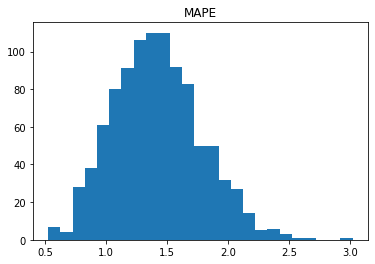

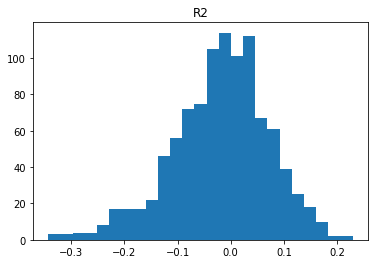

In [21]:
# Distribution plots (3 points)
fig, ax = plt.subplots()
ax.hist(MAPE_boot, bins = 25)
ax.set_title("MAPE")

fig, ax2 = plt.subplots()
ax2.hist(R2_boot, bins = 25)
ax2.set_title("R2")

**Written answer (2 pts):**
The error estimate (mean absolute percentage error) is quite high, so I do not think this is a very good fit. In addition, R2 value is close to 0, and in fact the confidence interval overlaps 0! So it is possible that our model does a very very poor job of explaining the variability in the data. 

I could have used a t-test, for the mean absolute percentage error, as I am looking at means in this case. However, the r2 value is NOT a mean, so unless I were to look at mean r2 values, using the t-distribution to make confidence intervals would be a poor idea. 

## Task 2 - Classification Model and Crossvalidation (55 points)

Now we will work on the classification problem. For this, we will train a Logistic Regression with Ridge Penalization, fitting the alpha parameter manually using a crossvalidation scorer. We will also explore whether quadratic polynomials can help with this process.

### Question 2.1 - Base Model (10 points)

a. Create a **stratified** train / test split so that the target variable is now the binary variable Outcome. Use all predictive variables available (without Time or ID).  
b. Train an unregularized logistic regression over the unstandardized data.  
c. Calculate the AUC score and plot the ROC curve for the test set. Use the Recurrence ('R') label as the positive value.  
d. Written question: Why do you see that AUC shape?  


In [22]:
# Train test split (1 pt)
cancer_data = pd.read_csv("Dataset.csv")
X = cancer_data.drop(["Outcome", "ID", "Time"], axis = "columns")

# Binarize, so now a positive case is R (1)
y = cancer_data.Outcome
y = pd.get_dummies(y, drop_first = True)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.3,
                                                random_state=0,
                                                stratify = y)



In [23]:
# Unregularized logistic regression (3pts)
unreg_log = LogisticRegression(penalty = 'none', solver = 'saga')
# Raises convergence warning ^
unreg_log.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='saga')

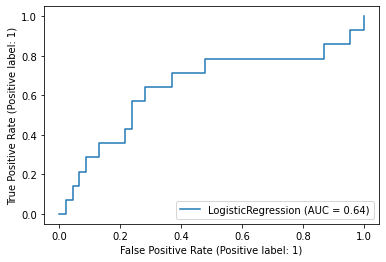

The AUC of the curve is 0.643


In [24]:
# Calculate AUC and ROC curve (3pts)
# ROC for all-variable classifier [2pts]
y_test_prob = unreg_log.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:, 1], pos_label=1)
auc_val = auc(fpr, tpr)

# Plot curve
sk.metrics.RocCurveDisplay.from_estimator(unreg_log, Xtest, ytest)
plt.show()
print('The AUC of the curve is %.3f' % auc_val)

**Written answer (3pts):**
This AUC shape is because it is slightly better than a completely random predictor, which would be an AUC of 0.50. Since we have an AUC of 0.64, the area under the curve is larger than a linear path, and the ROC curve increases quickle then plateaus. 

### Question 2.2 Regularizing the Model (15 points)

Now explore how regularization impacts the model. 

a. Find the best C parameter by fitting Ridge Logistic Regressions using the training data (do you need to use a pipeline?), creating a **stratified** Crossvalidation with three folds that uses the AUC score as the deciding measure. Explore 50 values of C between $10^{-6}$ and $10^{-2}$ (change the exponent, not the base) and plot the average AUC for each value of $\log_{10}(C)$.  

b. Select a C value and train a model over the full training dataset. Calculate the AUC score and plot the ROC curve of your regularized model over the test set.  

c. Written question: How does your model perform compared to the model in the previous question? Compare performance vs model complexity.  

In [25]:
# Train the regularized logistic regression. (8 pts)
C = 10**(np.linspace(-6,-2, 50))
colnames = Xtrain.columns 

# We are regularizing, so we must standardize first. Note there are no categoricals in my data set, so
# I standardize everything.
LogPipeline = Pipeline([
                        ('scaling', StandardScaler())
])

# Use our standard scaler on Xtrain.
Xtrain = pd.DataFrame(LogPipeline.fit_transform(Xtrain))
Xtrain.columns = colnames

# Now that we have re-scaled, we will apply the logistic regression
LogReg = LogisticRegression(penalty='l2', solver='saga', tol=0.001, 
                           max_iter=1000)

gscv = GridSearchCV(
    LogReg, 
    param_grid = {'C':C},
    scoring = "roc_auc", 
    cv = 3
)
# Fit using grid search
gscv.fit(Xtrain,ytrain.values[:,0])

# Fit 
#LogReg.fit(Xtrain, ytrain.values[:,0])

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, solver='saga',
                                          tol=0.001),
             param_grid={'C': array([1.00000000e-06, 1.20679264e-06, 1.45634848e-06, 1.75751062e-06,
       2.12095089e-06, 2.55954792e-06, 3.08884360e-06, 3.72759372e-06,
       4.49843267e-06, 5.42867544e-06, 6.55128557e-06, 7.90604321e-06,
       9.54095476e-06, 1.15139540e-05, 1.38949549e-05, 1.67683294e-05,
       2...
       1.93069773e-04, 2.32995181e-04, 2.81176870e-04, 3.39322177e-04,
       4.09491506e-04, 4.94171336e-04, 5.96362332e-04, 7.19685673e-04,
       8.68511374e-04, 1.04811313e-03, 1.26485522e-03, 1.52641797e-03,
       1.84206997e-03, 2.22299648e-03, 2.68269580e-03, 3.23745754e-03,
       3.90693994e-03, 4.71486636e-03, 5.68986603e-03, 6.86648845e-03,
       8.28642773e-03, 1.00000000e-02])},
             scoring='roc_auc')

Text(0.5, 0, 'C-value')

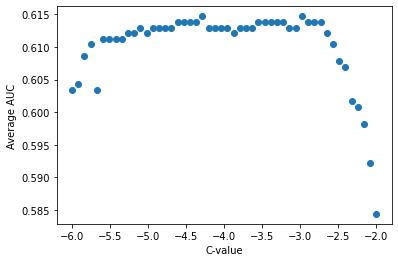

In [26]:
# Plot Cs (3 pts)
alpha_best = np.log10(gscv.best_params_["C"])
cv_error = gscv.cv_results_['mean_test_score']

fig, ax = plt.subplots()
ax.scatter(np.log10(C), cv_error)
ax.set_ylabel("Average AUC")
ax.set_xlabel("C-value")

In [27]:
# Refit best estimator (1 pt)

bestModel = LogisticRegression(penalty='l2', solver='saga', tol=0.001, 
                           max_iter=1000, C = 10**alpha_best)

bestModel.fit(Xtrain, ytrain)
ypred = bestModel.predict(Xtest)


#cv_auc = cross_val_score(bestModel, Xtrain, ytrain, cv = 3, scoring = "roc_auc")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


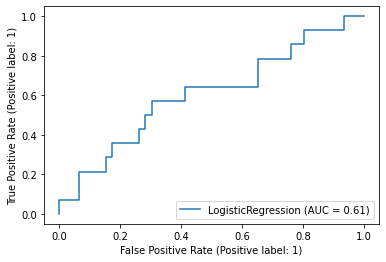

The AUC of the curve is 0.606


In [28]:
# Calculate AUC and ROC curve (1 pt)
y_test_prob = bestModel.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:, 1], pos_label=1)
auc_val_reg = auc(fpr, tpr)

# Plot curve
sk.metrics.RocCurveDisplay.from_estimator(bestModel, Xtest, ytest)
plt.show()
print('The AUC of the curve is %.3f' % auc_val_reg)

**Written answer (2 pts):**
The models actually perform very similarly peculiarly. This is not expected, but the second model is much more complex because I regularized, and therefore had to standardize. So our second model is more complex, with very little return gains in terms of AUC. However, Ridge regressions MUST be standardized first! So I will use the second model.

### Question 2.3 - Testing Polynomial Features (20 points)

The final model we will test will focus on studying the impact of polynomial features. As there are so many variables, we will only create these for the 'mean' variables. For this:

a. Create a pipeline that first creates quadratic polynomial variables **only for the mean variables**, then standardizes all variables and finally applies a regularized logistic regression with **Elastic Net** penalty.  *Hint: Remember the example to [standardize only some variables](https://stackoverflow.com/questions/37685412/avoid-scaling-binary-columns-in-sci-kit-learn-standsardscaler) and adapt it to apply polinomial transformation to only some variables.*

b. Explore the `l1_ratio` parameter in the set $\{0.01, 0.1, 0.2, 0.7, 0.75, 0.8, 0.9, 0.95\}$  and the C values from the previous question. Obtain the best `l1_ratio` and C parameters for your pipeline using AUC as your scorer. Print the best `l1_ratio` and the best C parameter and remember to use the model fitted over the full training set.  

c. Calculate the AUC over the test set and plot the ROC curve.

d. Print the coefficients for the polynomial features. **Written answer: Are the polynomial features used?** *Hint: The FeatureUnion operator matches variables in the same order as they were given.*

In [29]:
# Create pipeline (10 pts) In next box i use grid search to find params (best l1 and best C)
# But int his box, I am fitting it.
mean_vars = ['mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension']

not_mean_vars = ['tumor_size', 'SD_radius', 'SD_texture', 'SD_perimeter', 'SD_area', 'SD_smoothness',
       'SD_compactness', 'SD_concavity', 'SD_concave_points', 'SD_symmetry',
       'SD_fractal_dimension', 'Worst3_radius', 'Worst3_texture',
       'Worst3_perimeter', 'Worst3_area', 'Worst3_smoothness',
       'Worst3_compactness', 'Worst3_concavity', 'Worst3_concave_points',
       'Worst3_symmetry', 'Worst3_fractal_dimension']

Xtrain.columns
l1_ratios = np.array([0.01,0.1,0.2,0.7,0.75,0.8,0.9,0.95])
LogFF = LogisticRegressionCV(penalty='elasticnet', solver='saga', tol=0.001, 
                           max_iter=1000, l1_ratios = l1_ratios, Cs = C, cv = 3, scoring = "roc_auc")

LogPipeline2 = Pipeline(steps=[('feature_processing', FeatureUnion(transformer_list = [
                                      ('not_mean', Pipeline(steps = [
                                        ('select', FunctionTransformer(lambda data: data.loc[:, not_mean_vars])),
                                        ('scaler', StandardScaler())   # Scale the non-mean variables
                                     ])),
                                      #Standardize
                                      ('standard', Pipeline(steps = [
                                        ('select', FunctionTransformer(lambda data: data.loc[:, mean_vars])),
                                        # Polynomial transform could go here. If want to scale only a few, then would
                                        # stack another feature transformer
                                        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                                        ('scaler', StandardScaler()) 
                                                        ]))
                            ])),
                              ('Logistic', LogFF)]
)
LogPipeline2.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('feature_processing',
                 FeatureUnion(transformer_list=[('not_mean',
                                                 Pipeline(steps=[('select',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f90156a6cb0>)),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('standard',
                                                 Pipeline(steps=[('select',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f90156a63b0>)),
                                                                 ('poly',
                                                                  PolynomialFeatures(include_bias=False)),
                                                                 ('...
       

In [30]:
mean_vars = ['mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension']

not_mean_vars = ['tumor_size', 'SD_radius', 'SD_texture', 'SD_perimeter', 'SD_area', 'SD_smoothness',
       'SD_compactness', 'SD_concavity', 'SD_concave_points', 'SD_symmetry',
       'SD_fractal_dimension', 'Worst3_radius', 'Worst3_texture',
       'Worst3_perimeter', 'Worst3_area', 'Worst3_smoothness',
       'Worst3_compactness', 'Worst3_concavity', 'Worst3_concave_points',
       'Worst3_symmetry', 'Worst3_fractal_dimension']

Xtrain.columns
l1_ratios = np.array([0.01,0.1,0.2,0.7,0.75,0.8,0.9,0.95])
LogFF = LogisticRegression(penalty='elasticnet', solver='saga', tol=0.001, 
                           max_iter=1000)

LogPipeline2b = Pipeline(steps=[('feature_processing', FeatureUnion(transformer_list = [
                                      ('not_mean', Pipeline(steps = [
                                        ('select', FunctionTransformer(lambda data: data.loc[:, not_mean_vars])),
                                        ('scaler', StandardScaler())   # Scale the non-mean variables
                                     ])),
                                      #Standardize
                                      ('standard', Pipeline(steps = [
                                        ('select', FunctionTransformer(lambda data: data.loc[:, mean_vars])),
                                        # Polynomial transform could go here. If want to scale only a few, then would
                                        # stack another feature transformer
                                        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                                        ('scaler', StandardScaler()) 
                                                        ]))
                            ])),
                              ('Logistic', LogFF)]
)

# Have made a pipeline, now we apply our grid search onto it
gscv2 = sk.model_selection.GridSearchCV(
    LogPipeline2b, 
    param_grid = {'Logistic__C': C, 'Logistic__l1_ratio': l1_ratios},
    scoring = "roc_auc", 
    cv = 3
)

gscv2.fit(Xtrain, ytrain)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_processing',
                                        FeatureUnion(transformer_list=[('not_mean',
                                                                        Pipeline(steps=[('select',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7f90156a6290>)),
                                                                                        ('scaler',
                                                                                         StandardScaler())])),
                                                                       ('standard',
                                                                        Pipeline(steps=[('select',
                                                                                         FunctionTransformer(func=<function <lambda> at 0x7f90156e1680>)),
                                 

In [31]:
# Create the CV and the scorer. (2 pts)
# Did this in the box above, when I fit the GridSearchCV, this uses cross-validation internally. 
# CV is built into LogisticRegressionCV, which I use above
sc = make_scorer("auc_roc")
#LogPipeline2.fit(Xtrain, ytrain)


In [32]:
# Print best outputs (1 pt)
# Best results from grid search
alpha_best = np.log10(gscv2.best_params_["Logistic__C"])
l1_best = gscv2.best_params_["Logistic__l1_ratio"]
cv_error = gscv2.cv_results_['mean_test_score']
print("Best L1 {:.4f}, Best alpha: {:.4f}".format(alpha_best, l1_best))

Best L1 -2.6531, Best alpha: 0.0100


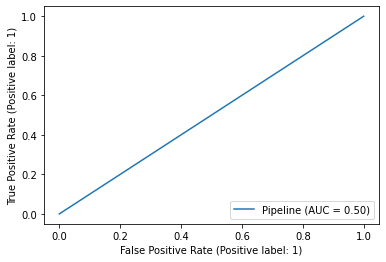

The AUC of the curve is 0.500


In [33]:
# Plot ROC curve (2 pts)
y_test_prob = LogPipeline2.predict_proba(Xtest)
fpr, tpr, thresholds = roc_curve(ytest, y_test_prob[:, 1], pos_label=1)
auc_val_reg_squared = auc(fpr, tpr)

# Plot curve
sk.metrics.RocCurveDisplay.from_estimator(LogPipeline2, Xtest, ytest)
plt.show()
print('The AUC of the curve is %.3f' % auc_val_reg_squared)

In [34]:
# Get coefficients for the polynomial features. (2 pts)
mean_vars2 = np.zeros(len(mean_vars))
for i, meanvar in enumerate(mean_vars):
  mean_vars2[i] = i

#cols = np.r_[num_vars, mean_vars, mean_vars2] # NEed to add squared terms to labels if i had more time
coefdf2 = pd.DataFrame(LogPipeline2[1].coef_)


**Written Answer (3 pts):**
Some polynomial features ARE used, as the coefficients near the end are non-zero. However some coefficients go to zero, and these correspond in some cases to squared terms.

### Question 2.4 - A better comparison (10 points)

So far all three models have given similar AUC scores. Now we will study whether these differences are significant. 

a. **Without refitting the models,** obtain a confidence interval for the test AUC measure of the three models at a 95% significance using 1000 bootstrap runs.    
b. Written question: What model would you suggest using?

In [35]:
# Create and train bootstrap (7 points)
def Bootstrap(ytest, yp, numboot):
  n = len(ytest)
  bootData = np.zeros(numboot)
  for i in range(numboot):
    # Re-shuffle testing set
    index = np.random.randint(0, n, n)
    AUC = roc_auc_score(ytest[index], yp[index]) 
    bootData[i] = AUC 

  return bootData

# MODEL 1
bootData1 = Bootstrap(ytest.values, unreg_log.predict(Xtest), 1000)

# MODEL 2
bootData2 = Bootstrap(ytest.values, bestModel.predict(Xtest), 1000)

# MODEL 3
bootData3 = Bootstrap(ytest.values, LogPipeline2.predict(Xtest), 1000)

In [36]:
# Calculate CIs (2 pts)

# BT 1
boos_estimate_1 = bootData1 - auc_val

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
q = np.quantile(boos_estimate_1, [0.025, 0.975])

ci_min_1 = auc_val - q[1]
ci_max_1 = auc_val - q[0]
# 
print(f'The CI for the AUC of the first model is: {(ci_min_1,ci_max_1) }')

# BT 2
boos_estimate_2 = bootData2 - auc_val_reg

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
q = np.quantile(boos_estimate_r2, [0.025, 0.975])

ci_min_2 = auc_val_reg - q[1]
ci_max_2 = auc_val_reg - q[0]
# 
print(f'The CI for the AUC of the model 2 is: {(ci_min_2,ci_max_2) }')

# BT 3
boos_estimate_3 = bootData3 - auc_val_reg_squared

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
q = np.quantile(boos_estimate_3, [0.025, 0.975])

ci_min_3 = auc_val_reg_squared - q[1]
ci_max_3 = auc_val_reg_squared - q[0]
# 
print(f'The CI for the R2 of the model 3 is: {(ci_min_3,ci_max_3) }')

The CI for the AUC of the first model is: (0.7857142857142858, 0.7857142857142858)
The CI for the AUC of the model 2 is: (0.4687066552901482, 0.83729575876784)
The CI for the R2 of the model 3 is: (0.5, 0.5)


**Written answer (1 pt):**
I want to choose the most parsiminous model if possible. In this case, the unregularized model actually gave the best AUC scores, even when looking at the CI. This is a very surprising result, and not what I would expect. However, because of this result it seems I should choose this model, as it is simple, though it is unregularized (and this may cause problems when doing a Ridge regression). BUT we must be aware that because it is un standardzied and I am regularizing, this will liekly cause errors. I would investigate further. 